<a href="https://colab.research.google.com/github/carloscelestino1/DataAnalysis/blob/main/BlackFriday.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ESTUDO REALIZADO VISANDO DEMONSTRAR A ANÁLISE COMPORTAMENTAL DE CLIENTES DURANTE A BLACKFRIDAY.
ARQUIVO DISPONÍVEL NO SITE: https://datahack.analyticsvidhya.com/contest/all/


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [3]:
from pandas.io.parsers.readers import read_csv
pd = read_csv('BLACKFRIDAY.csv')
pd


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172


In [4]:
pd.columns.to_list()

['User_ID',
 'Product_ID',
 'Gender',
 'Age',
 'Occupation',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3',
 'Purchase']

In [5]:
newData = pd[['User_ID','Gender','Age','Marital_Status','Purchase']]
newData

,User_ID,Gender,Age,Marital_Status,Purchase
0,1000001,F,0-17,0,8370
1,1000001,F,0-17,0,15200
2,1000001,F,0-17,0,1422
3,1000001,F,0-17,0,1057
4,1000002,M,55+,0,7969
...,...,...,...,...,...
537572,1004737,M,36-45,0,11664
537573,1004737,M,36-45,0,19196
537574,1004737,M,36-45,0,8043
537575,1004737,M,36-45,0,7172


In [6]:
newData.isnull().sum()

User_ID           0
Gender            0
Age               0
Marital_Status    0
Purchase          0
dtype: int64

In [7]:
razaoHxM = newData.Gender.value_counts()
razaoHxM

M    405380
F    132197
Name: Gender, dtype: int64

In [8]:
total = razaoHxM.sum()

In [9]:
percentage = []
for i in range(razaoHxM.shape[0]):
    pct = (razaoHxM[i] / total) * 100
    percentage.append(round(pct, 2))

razaoHxM['Percentage'] = percentage
display(razaoHxM)

M                     405380
F                     132197
Percentage    [75.41, 24.59]
Name: Gender, dtype: object

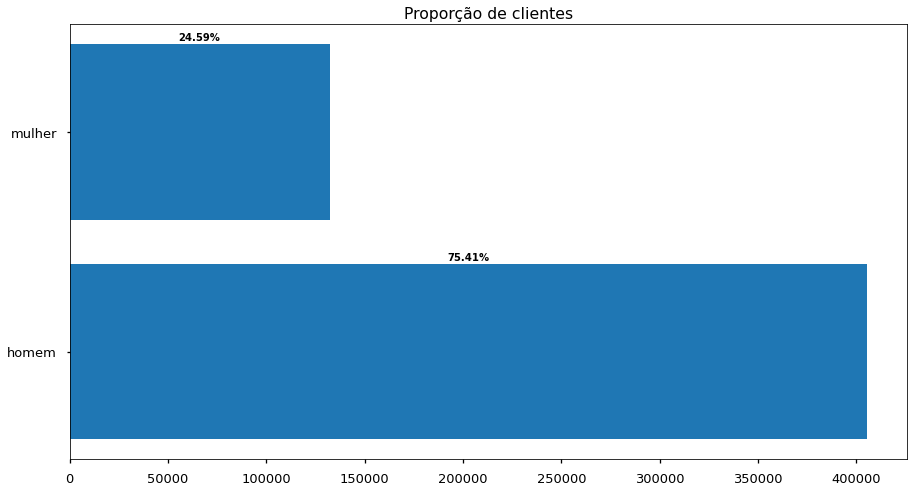

In [74]:
x = [razaoHxM[0],razaoHxM[1]]
y = ['homem','mulher']
graph1=plt.barh(y,x)
plt.title('Proporção de clientes')

i = 0
for p in graph1:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
     
    plt.text(x+width/2,
             y+height*1.01,
             str(razaoHxM.Percentage[i])+'%',
             ha='center',
             va='bottom',
             weight='bold')
    i += 1



In [11]:
relacaoIdade = newData[['Gender','Age']]
relacaoIdade

,Gender,Age
0,F,0-17
1,F,0-17
2,F,0-17
3,F,0-17
4,M,55+
...,...,...
537572,M,36-45
537573,M,36-45
537574,M,36-45
537575,M,36-45


In [12]:
relacao = relacaoIdade.value_counts()

In [13]:
razaoIdade = relacaoIdade.Age.value_counts()

In [14]:
relacao = relacao.sort_index()

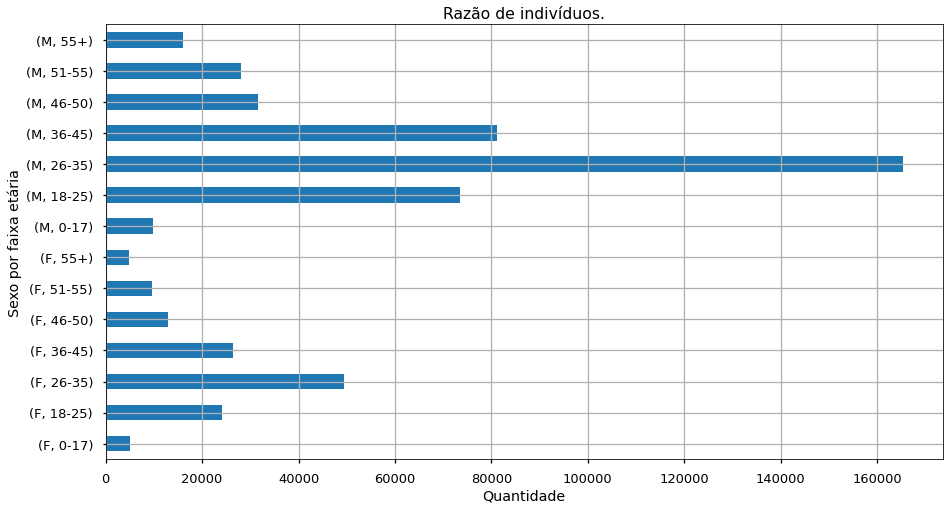

In [15]:
plt.style.use('seaborn-talk')
plt.rcParams['figure.figsize'] = [15,8]
relacao.plot(kind='barh')
plt.title('Razão de indivíduos.')
plt.xlabel('Quantidade')
plt.ylabel('Sexo por faixa etária')
plt.grid(True)
plt.show()

In [17]:
relacaoH = relacao['M']
relacaoH

Age
0-17       9754
18-25     73577
26-35    165342
36-45     81079
46-50     31670
51-55     27984
55+       15974
dtype: int64

In [20]:
relacaoF = relacao['F']
relacaoF

Age
0-17      4953
18-25    24057
26-35    49348
36-45    26420
46-50    12856
51-55     9634
55+       4929
dtype: int64

#Outra forma de apresentar o gráfico:

In [36]:
listaH = []
listaM = []

for i in relacaoH:
  listaH.append(i)
for i in relacaoF:
  listaM.append(i)


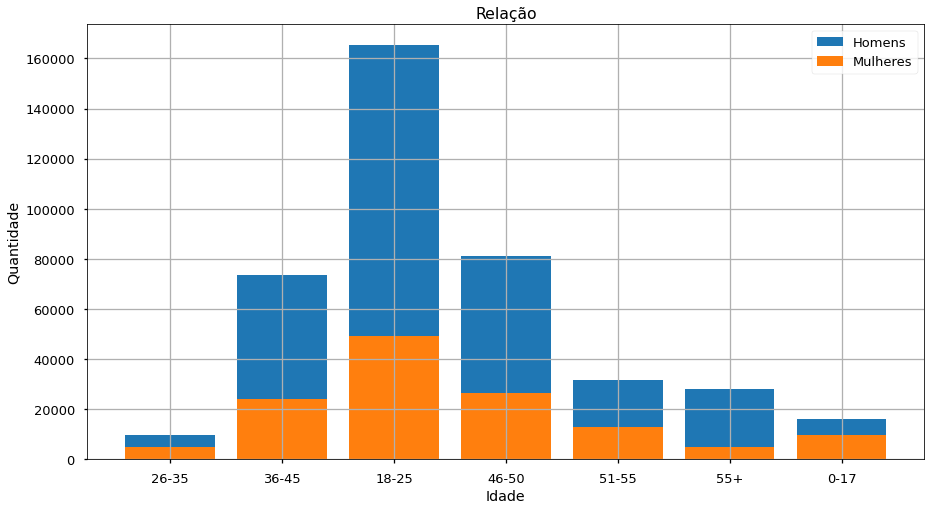

In [76]:
x1 = listaH
x2 = listaM

y1 = relacao['M'].index
y2 = relacao['F'].index

plt.title("Relação")
plt.xlabel("Idade")
plt.ylabel("Quantidade")

plt.bar(y1,x1, label = 'Homens') #adicionando legendas
plt.bar(y2,x2, label = 'Mulheres')
plt.legend()
plt.grid(True)
plt.show()



In [77]:
idadeEstadoC = pd[['Age','Marital_Status']]
idadeEstadoC

,Age,Marital_Status
0,0-17,0
1,0-17,0
2,0-17,0
3,0-17,0
4,55+,0
...,...,...
537572,36-45,0
537573,36-45,0
537574,36-45,0
537575,36-45,0


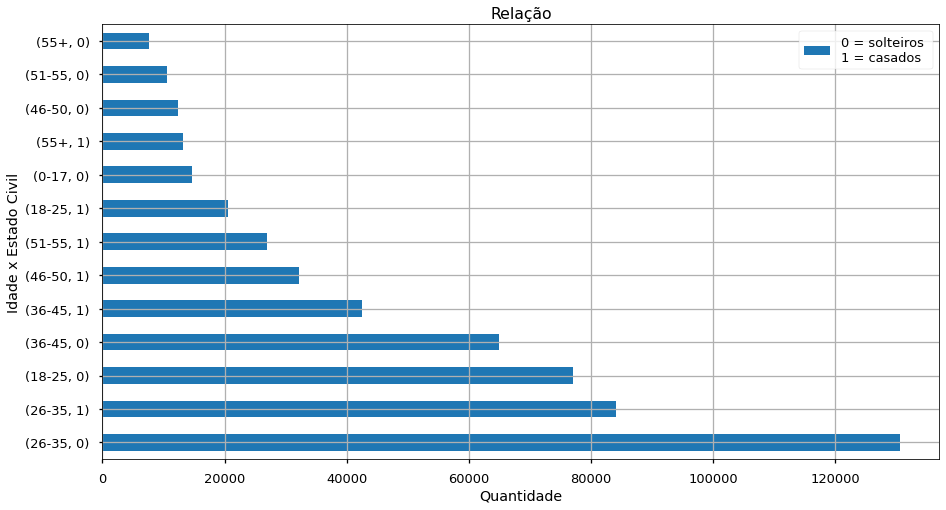

In [143]:
relacaoIxE = idadeEstadoC.value_counts()
relacaoIxE.plot(kind='barh')
plt.legend(["0 = solteiros \n1 = casados"])
plt.title("Relação")
plt.xlabel("Quantidade")
plt.ylabel("Idade x Estado Civil")
plt.grid(True)
